***
# Model Building with PyCaret
***

In [1]:
from pycaret.classification import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pd.set_option("display.max_columns", None)
data1 = pd.read_csv("cust.csv", index_col=[0])
data1

,Name,E-mail,Phone Number,GENDER,DOB,AGE,MARITAL STATUS,EMPLOYMENT STATUS,LGA,Account Number,Customer ID,Merchant Name,Loan Amount,Tenure,Merchant Service Charge,Expected Revenue,Actual Revenue,Loan Created Date,Loan Due Date,Loan Duration,Monthly Repayment Amount,1st Installment,2nd Installment,3rd Installment,4th Installment,5th Installment,6th Installment,Amount Received,Total Repayment,Next Due Date,Repayment day,Account Officer,Interest rate,Current Outstanding Balance,Curent O. B + Default Charge,Total Outstanding Balance,Default Charge,Default Charge.1,Total Outstanding + Default Charge,Interest on Date Adjustment,Loan Age (Days),Current/Expired,Classification,Items purchased,Comment,Target
0,Similoluwa Bolaniran,similoluwa.bolaniran@gmail.com,8027644362,M,NaN,36.1,M,E,Unknown,1.000001e+09,APACE/001,Klarrylogic,52000,5,1040,6240.00,6240.00000,2021-12-09,2022-05-09,151,11648.00000,11648.00000,11648.00000,11648.00000,11648.00000,11648.00000,0.00000,5.824000e+04,58240.00,Cleared,44539,Similoluwa,0,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
1,Anuoluwapo Amusa,anu.awodiya@gmail.com,8122239291,F,NaN,36.1,U,SE,Unknown,1.000001e+09,APACE/002,Klarrylogic,600000,5,2000,72000.00,72000.00000,2021-12-10,2022-05-10,151,134400.00000,134400.00000,134400.00000,134400.00000,134400.00000,134400.00000,0.00000,6.720000e+05,672000.00,Cleared,44540,Similoluwa,0,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,PS 5,NaN,1.0
2,Olanrewaju Idris,lanrewaju86@gmail.com,8074292521,M,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/003,DIX Technologies,443000,6,2000,64045.14,64045.14000,2021-12-14,2022-06-14,182,84507.52333,84507.52333,84507.52333,84507.52333,84507.52333,84507.52333,89007.52333,5.115451e+05,507045.14,Cleared,44544,Similoluwa,0,0.0,0.0,4500.000,4225.376167,0.0,274.623833,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
3,Damilola Fene-Osakwe,dami.adeleye@gmail.com,8032000316,U,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/004,Bagsnextra,21500,5,430,2647.41,2647.41000,2022-05-25,2022-12-25,214,4829.48200,4829.48200,4829.48200,4829.48200,4829.48200,4850.00000,0.00000,2.416793e+04,24147.41,Cleared,44706,Similoluwa,0,0.0,0.0,20.518,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
4,Damilola Owolabi,dami.owolabi@gmail.com,8022562144,U,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/005,Klarrylogic,750000,4,2000,76470.00,76470.00000,2022-01-02,2022-05-02,120,206617.50000,206617.50000,206617.50000,206617.50000,206617.50000,0.00000,0.00000,8.264700e+05,826470.00,Cleared,44563,Similoluwa,0,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Take Brothers,princekehinde001@gmail.com,08037256502,M,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/301,NaN,1000000,3,3000,122329.44,122329.44000,2022-09-29,2022-12-29,91,374109.81330,374109.81330,374109.81330,374280.00000,0.00000,0.00000,0.00000,1.122500e+06,1122329.44,Cleared,29-,Paul,0.03,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,NaN,Others,NaN,0.0
295,Mercy Beddings,mercyoji6@gmail.com,08039232871,F,NaN,36.1,U,U,Unknown,NaN,APACE/302,NaN,500000,6,3000,110087.89,18347.98167,2022-09-29,2023-03-29,181,101681.31500,101681.31500,50318.68000,0.00000,0.00000,0.00000,0.00000,1.520000e+05,610087.89,Immediately,29-,Paul,0.06,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,NaN,Others,NaN,0.0
296,David Gbetogo,daveson999@gmail.com,08055447992,M,1984-04-27 00:00:00,39.0,M,E,Unknown,NaN,APACE/303,Krisdave Opay Business,300000,6,3000,66052.73,44035.15333,2022-10-07,2023-04-07,182,61008.78833,61008.78833,61008.78833,61008.78833,61008.78833,0.00000,0.00000,2.440352e+05,366052.73,Immediately,7-,Paul,0.06,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,NaN,Others,NaN,

In [3]:
data2 = pd.read_csv("customer_data_remodelled.csv")
data2

,Name,E-mail,Phone Number,GENDER,DOB,AGE,MARITAL STATUS,EMPLOYMENT STATUS,LGA,Account Number,Customer ID,Merchant Name,Loan Amount,Tenure,Merchant Service Charge,Expected Revenue,Actual Revenue,Loan Created Date,Loan Due Date,Monthly Repayment Amount,1st Installment,2nd Installment,3rd Installment,4th Installment,5th Installment,6th Installment,Amount Received,Total Repayment,Next Due Date,Repayment day,Account Officer,Interest rate,Current Outstanding Balance,Curent O. B + Default Charge,Total Outstanding Balance,Default Charge,Default Charge.1,Total Outstanding + Default Charge,Interest on Date Adjustment,Loan Age (Days),Current/Expired,Classification,Items purchased,Comment
0,Similoluwa Bolaniran,similoluwa.bolaniran@gmail.com,8027644362,M,NaN,36.1,M,E,Unknown,1.000001e+09,APACE/001,Klarrylogic,"₦52,000.00",5,"1,040.00","6,240.00","6,240.00",12/9/2021,5/9/2022,"11,648.00","11,648.00","11,648.00","11,648.00","11,648.00","11,648.00",0.00,"58,240.00","58,240.00",Cleared,9-,Similoluwa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3/26/2023,Cleared,Others,NaN
1,Anuoluwapo Amusa,anu.awodiya@gmail.com,8122239291,F,NaN,36.1,U,SE,Unknown,1.000001e+09,APACE/002,Klarrylogic,"₦600,000.00",5,"2,000.00","72,000.00","72,000.00",12/10/2021,5/10/2022,"134,400.00","134,400.00","134,400.00","134,400.00","134,400.00","134,400.00",0.00,"672,000.00","672,000.00",Cleared,10-,Similoluwa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3/26/2023,Cleared,PS 5,NaN
2,Olanrewaju Idris,lanrewaju86@gmail.com,8074292521,M,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/003,DIX Technologies,"₦443,000.00",6,"2,000.00","64,045.14","64,045.14",12/14/2021,6/14/2022,"84,507.52","84,507.52","84,507.52","84,507.52","84,507.52","84,507.52","89,007.52","511,545.14","507,045.14",Cleared,14-,Similoluwa,0.00,0.00,0.00,"4,500.00","4,225.38",0.00,274.62,0.00,0.0,3/26/2023,Cleared,Others,NaN
3,Damilola Fene-Osakwe,dami.adeleye@gmail.com,8032000316,U,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/004,Bagsnextra,"₦21,500.00",5,430.00,"2,647.41","2,647.41",12/25/2022,5/25/2022,"4,829.48","4,829.48","4,829.48","4,829.48","4,829.48","4,850.00",0.00,"24,167.93","24,147.41",Cleared,25-,Similoluwa,0.00,0.00,0.00,20.52,0.00,0.00,0.00,0.00,0.0,3/26/2023,Cleared,Others,NaN
4,Damilola Owolabi,dami.owolabi@gmail.com,8022562144,U,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/005,Klarrylogic,"₦750,000.00",4,"2,000.00","76,470.00","76,470.00",1/2/2022,5/2/2022,"206,617.50","206,617.50","206,617.50","206,617.50","206,617.50",0.00,0.00,"826,470.00","826,470.00",Cleared,2-,Similoluwa,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3/26/2023,Cleared,Others,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Take Brothers,princekehinde001@gmail.com,08037256502,M,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/301,NaN,"₦1,000,000.00",3,"3,000.00","122,329.44","122,329.44",9/29/2022,12/29/2022,"374,109.81","374,109.81","374,109.81","374,280.00",0.00,0.00,0.00,"1,122,499.63","1,122,329.44",Cleared,29-,Paul,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3/26/2023,cleared,Others,NaN
295,Mercy Beddings,mercyoji6@gmail.com,08039232871,F,NaN,36.1,U,U,Unknown,NaN,APACE/302,NaN,"₦500,000.00",6,"3,000.00","110,087.89","18,347.98",9/29/2022,3/29/2023,"101,681.32","101,681.32","50,318.68",0.00,0.00,0.00,0.00,"152,000.00","610,087.89",Immediately,29-,Paul,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3/26/2023,Doubtful,Others,NaN
296,David Gbetogo,daveson999@gmail.com,08055447992,M,04/27/1984,39.0,M,E,Unknown,NaN,APACE/303,Krisdave Opay Business,"₦300,000.00",6,"3,000.00","66,052.73","44,035.15",10/7/2022,4/7/2023,"61,008.79","61,008.79","61,008.79","61,008.79","61,008.79",0.00,0.00,"244,035.15","366,052.73",Immediately,7-,Paul,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,3/26/2023,performing,Others,NaN
297,Jackson Oaikhena,Jacksonoaikhena@gmail.com,07033388387,M,1/19/1989,34.0,S,E,Unknown,NaN,APACE/304,NaN,"₦220,000

In [4]:
data1.Classification = data2.Classification

In [5]:
data1

,Name,E-mail,Phone Number,GENDER,DOB,AGE,MARITAL STATUS,EMPLOYMENT STATUS,LGA,Account Number,Customer ID,Merchant Name,Loan Amount,Tenure,Merchant Service Charge,Expected Revenue,Actual Revenue,Loan Created Date,Loan Due Date,Loan Duration,Monthly Repayment Amount,1st Installment,2nd Installment,3rd Installment,4th Installment,5th Installment,6th Installment,Amount Received,Total Repayment,Next Due Date,Repayment day,Account Officer,Interest rate,Current Outstanding Balance,Curent O. B + Default Charge,Total Outstanding Balance,Default Charge,Default Charge.1,Total Outstanding + Default Charge,Interest on Date Adjustment,Loan Age (Days),Current/Expired,Classification,Items purchased,Comment,Target
0,Similoluwa Bolaniran,similoluwa.bolaniran@gmail.com,8027644362,M,NaN,36.1,M,E,Unknown,1.000001e+09,APACE/001,Klarrylogic,52000,5,1040,6240.00,6240.00000,2021-12-09,2022-05-09,151,11648.00000,11648.00000,11648.00000,11648.00000,11648.00000,11648.00000,0.00000,5.824000e+04,58240.00,Cleared,44539,Similoluwa,0,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
1,Anuoluwapo Amusa,anu.awodiya@gmail.com,8122239291,F,NaN,36.1,U,SE,Unknown,1.000001e+09,APACE/002,Klarrylogic,600000,5,2000,72000.00,72000.00000,2021-12-10,2022-05-10,151,134400.00000,134400.00000,134400.00000,134400.00000,134400.00000,134400.00000,0.00000,6.720000e+05,672000.00,Cleared,44540,Similoluwa,0,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,PS 5,NaN,1.0
2,Olanrewaju Idris,lanrewaju86@gmail.com,8074292521,M,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/003,DIX Technologies,443000,6,2000,64045.14,64045.14000,2021-12-14,2022-06-14,182,84507.52333,84507.52333,84507.52333,84507.52333,84507.52333,84507.52333,89007.52333,5.115451e+05,507045.14,Cleared,44544,Similoluwa,0,0.0,0.0,4500.000,4225.376167,0.0,274.623833,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
3,Damilola Fene-Osakwe,dami.adeleye@gmail.com,8032000316,U,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/004,Bagsnextra,21500,5,430,2647.41,2647.41000,2022-05-25,2022-12-25,214,4829.48200,4829.48200,4829.48200,4829.48200,4829.48200,4850.00000,0.00000,2.416793e+04,24147.41,Cleared,44706,Similoluwa,0,0.0,0.0,20.518,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
4,Damilola Owolabi,dami.owolabi@gmail.com,8022562144,U,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/005,Klarrylogic,750000,4,2000,76470.00,76470.00000,2022-01-02,2022-05-02,120,206617.50000,206617.50000,206617.50000,206617.50000,206617.50000,0.00000,0.00000,8.264700e+05,826470.00,Cleared,44563,Similoluwa,0,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Cleared,Others,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Take Brothers,princekehinde001@gmail.com,08037256502,M,NaN,36.1,U,U,Unknown,1.000001e+09,APACE/301,NaN,1000000,3,3000,122329.44,122329.44000,2022-09-29,2022-12-29,91,374109.81330,374109.81330,374109.81330,374280.00000,0.00000,0.00000,0.00000,1.122500e+06,1122329.44,Cleared,29-,Paul,0.03,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,cleared,Others,NaN,0.0
295,Mercy Beddings,mercyoji6@gmail.com,08039232871,F,NaN,36.1,U,U,Unknown,NaN,APACE/302,NaN,500000,6,3000,110087.89,18347.98167,2022-09-29,2023-03-29,181,101681.31500,101681.31500,50318.68000,0.00000,0.00000,0.00000,0.00000,1.520000e+05,610087.89,Immediately,29-,Paul,0.06,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,Doubtful,Others,NaN,0.0
296,David Gbetogo,daveson999@gmail.com,08055447992,M,1984-04-27 00:00:00,39.0,M,E,Unknown,NaN,APACE/303,Krisdave Opay Business,300000,6,3000,66052.73,44035.15333,2022-10-07,2023-04-07,182,61008.78833,61008.78833,61008.78833,61008.78833,61008.78833,0.00000,0.00000,2.440352e+05,366052.73,Immediately,7-,Paul,0.06,0.0,0.0,0.000,0.000000,0.0,0.000000,0,0.0,2023-03-02 14:19:05.376,perfor

In [6]:
data2.columns

Index(['Name', 'E-mail', 'Phone Number', 'GENDER', 'DOB', 'AGE',
       'MARITAL STATUS', 'EMPLOYMENT STATUS', 'LGA', 'Account Number',
       'Customer ID', 'Merchant Name', 'Loan Amount', 'Tenure',
       'Merchant Service Charge', 'Expected Revenue', 'Actual Revenue',
       'Loan Created Date', 'Loan Due Date', 'Monthly Repayment Amount',
       '1st Installment', '2nd Installment', '3rd Installment',
       '4th Installment', '5th Installment', '6th Installment',
       'Amount Received', 'Total Repayment', 'Next Due Date', 'Repayment day',
       'Account Officer', 'Interest rate', 'Current Outstanding Balance',
       'Curent O. B + Default Charge', 'Total Outstanding Balance',
       'Default Charge', 'Default Charge.1',
       'Total Outstanding + Default Charge', 'Interest on Date Adjustment',
       'Loan Age (Days)', 'Current/Expired', 'Classification',
       'Items purchased', 'Comment'],
      dtype='object')

In [7]:

def merge_classes(data):
    df = data.copy()
    
    # merge 'cleared' and 'performing' into 'Cleared'
    df['classification'] = df['classification'].replace({'Cleared': 'cleared', 'performing': 'cleared'})
    
    # merge 'Substandard' into 'LOST'
    df['classification'] = df['classification'].replace({"LOST":"lost", 'Substandard':'lost', 'Doubtful':"lost",
                                                         "Pass and watch":"lost"})
    
    return df


def revamp(data):
    df = data.copy()
    
    df.set_index('Customer ID')
    
    df.drop(columns=['E-mail', 'Phone Number', 'DOB', 'Account Number', 'Customer ID', 'Merchant Name',  'Actual Revenue',
                    '1st Installment', '2nd Installment', '3rd Installment','4th Installment', '5th Installment',
                     '6th Installment','Next Due Date', 'Repayment day','Account Officer',"Target",
                     'Loan Age (Days)', 'Current/Expired', "Comment", "LGA", 'Default Charge.1', "Name", 
                     'Total Outstanding + Default Charge', 'Curent O. B + Default Charge', 'Interest on Date Adjustment'
                    ], inplace=True)
    
    new_column_names = {col: col.lower().replace(' ', '_') for col in df.columns}
    
    renamed_df = df.rename(columns=new_column_names)
    
    renamed_df = merge_classes(renamed_df)
    
    mode = renamed_df.classification.mode()[0]
    renamed_df.classification.fillna(mode, inplace=True)
    
    renamed_df.interest_rate = renamed_df.interest_rate.replace('Swift credit', 0)
    renamed_df["interest_rate"] = renamed_df['interest_rate'].astype(float)
    
    renamed_df.merchant_service_charge.replace("-",0, inplace=True)
    renamed_df["merchant_service_charge"] = renamed_df['merchant_service_charge'].astype(float)
    
    return renamed_df


data = revamp(data1)

In [8]:
data

,gender,age,marital_status,employment_status,loan_amount,tenure,merchant_service_charge,expected_revenue,loan_created_date,loan_due_date,loan_duration,monthly_repayment_amount,amount_received,total_repayment,interest_rate,current_outstanding_balance,total_outstanding_balance,default_charge,classification,items_purchased
0,M,36.1,M,E,52000,5,1040.0,6240.00,2021-12-09,2022-05-09,151,11648.00000,5.824000e+04,58240.00,0.00,0.0,0.000,0.000000,cleared,Others
1,F,36.1,U,SE,600000,5,2000.0,72000.00,2021-12-10,2022-05-10,151,134400.00000,6.720000e+05,672000.00,0.00,0.0,0.000,0.000000,cleared,PS 5
2,M,36.1,U,U,443000,6,2000.0,64045.14,2021-12-14,2022-06-14,182,84507.52333,5.115451e+05,507045.14,0.00,0.0,4500.000,4225.376167,cleared,Others
3,U,36.1,U,U,21500,5,430.0,2647.41,2022-05-25,2022-12-25,214,4829.48200,2.416793e+04,24147.41,0.00,0.0,20.518,0.000000,cleared,Others
4,U,36.1,U,U,750000,4,2000.0,76470.00,2022-01-02,2022-05-02,120,206617.50000,8.264700e+05,826470.00,0.00,0.0,0.000,0.000000,cleared,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,M,36.1,U,U,1000000,3,3000.0,122329.44,2022-09-29,2022-12-29,91,374109.81330,1.122500e+06,1122329.44,0.03,0.0,0.000,0.000000,cleared,Others
295,F,36.1,U,U,500000,6,3000.0,110087.89,2022-09-29,2023-03-29,181,101681.31500,1.520000e+05,610087.89,0.06,0.0,0.000,0.000000,lost,Others
296,M,39.0,M,E,300000,6,3000.0,66052.73,2022-10-07,2023-04-07,182,61008.78833,2.440352e+05,366052.73,0.06,0.0,0.000,0.000000,cleared,Others
297,M,34.0,S,E,220000,6,3000.0,48438.67,2022-10-07,2023-04-07,182,44739.77833,1.342896e+05,268438.67,0.06,0.0,0.000,0.000000,cleared,Others


In [9]:
data.classification.value_counts()

cleared    161
lost       138
Name: classification, dtype: int64

In [10]:
data.isnull().sum()

gender                         0
age                            0
marital_status                 0
employment_status              0
loan_amount                    0
tenure                         0
merchant_service_charge        0
expected_revenue               0
loan_created_date              0
loan_due_date                  0
loan_duration                  0
monthly_repayment_amount       0
amount_received                0
total_repayment                0
interest_rate                  0
current_outstanding_balance    0
total_outstanding_balance      0
default_charge                 0
classification                 0
items_purchased                0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       299 non-null    object 
 1   age                          299 non-null    float64
 2   marital_status               299 non-null    object 
 3   employment_status            299 non-null    object 
 4   loan_amount                  299 non-null    int64  
 5   tenure                       299 non-null    int64  
 6   merchant_service_charge      299 non-null    float64
 7   expected_revenue             299 non-null    float64
 8   loan_created_date            299 non-null    object 
 9   loan_due_date                299 non-null    object 
 10  loan_duration                299 non-null    int64  
 11  monthly_repayment_amount     299 non-null    float64
 12  amount_received              299 non-null    float64
 13  total_repayment     

In [12]:
data.columns

Index(['gender', 'age', 'marital_status', 'employment_status', 'loan_amount',
       'tenure', 'merchant_service_charge', 'expected_revenue',
       'loan_created_date', 'loan_due_date', 'loan_duration',
       'monthly_repayment_amount', 'amount_received', 'total_repayment',
       'interest_rate', 'current_outstanding_balance',
       'total_outstanding_balance', 'default_charge', 'classification',
       'items_purchased'],
      dtype='object')

In [13]:
modelling = setup(data=data, target='classification', categorical_features=["gender", "marital_status", "employment_status"], 
                  ignore_features=["loan_created_date", "loan_due_date", "items_purchased"],
                  numeric_imputation="mean", categorical_imputation="mode", remove_outliers=True)

,Description,Value
0,Session id,4133
1,Target,classification
2,Target type,Binary
3,Target mapping,"cleared: 0, lost: 1"
4,Original data shape,"(299, 20)"
5,Transformed data shape,"(288, 24)"
6,Transformed train set shape,"(198, 24)"
7,Transformed test set shape,"(90, 24)"
8,Ignore features,3
9,Numeric features,13


In [14]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9381,0.9608,0.9389,0.9359,0.9321,0.8755,0.8833,6.9510
catboost,CatBoost Classifier,0.9286,0.9635,0.9178,0.9338,0.9210,0.8559,0.8631,14.1830
rf,Random Forest Classifier,0.9238,0.9548,0.9067,0.9316,0.9158,0.8461,0.8507,6.2490
xgboost,Extreme Gradient Boosting,0.9190,0.9539,0.9178,0.9179,0.9119,0.8373,0.8464,5.6440
knn,K Neighbors Classifier,0.9095,0.9343,0.8656,0.9416,0.8962,0.8164,0.8257,4.9150
gbc,Gradient Boosting Classifier,0.9000,0.9368,0.8856,0.9014,0.8886,0.7977,0.8041,5.9920
et,Extra Trees Classifier,0.9000,0.9352,0.8756,0.9048,0.8864,0.7975,0.8020,7.6350
ada,Ada Boost Classifier,0.8995,0.9348,0.8844,0.8961,0.8885,0.7969,0.7995,5.3910
dt,Decision Tree Classifier,0.8902,0.8879,0.8644,0.9003,0.8769,0.7778,0.7850,4.6220
lr,Logistic Regression,0.8855,0.9116,0.8256,0.9296,0.8678,0.7679,0.7791,13.3580


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=4133, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [15]:
model = create_model("rf")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9048,0.9273,0.8000,1.0000,0.8889,0.8073,0.8228
1,0.8571,0.9182,0.8000,0.8889,0.8421,0.7123,0.7156
2,0.9048,0.9727,0.9000,0.9000,0.9000,0.8091,0.8091
3,0.8571,0.9000,0.9000,0.8182,0.8571,0.7149,0.7182
4,0.9524,0.9227,1.0000,0.9091,0.9524,0.9050,0.9091
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9048,0.9630,0.7778,1.0000,0.8750,0.8000,0.8165
8,0.8571,0.9444,0.8889,0.8000,0.8421,0.7123,0.7156


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [16]:
tune_rf = tune_model(model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9524,0.9500,0.9000,1.0000,0.9474,0.9041,0.9083
1,0.8571,0.8818,0.8000,0.8889,0.8421,0.7123,0.7156
2,0.9524,0.9455,1.0000,0.9091,0.9524,0.9050,0.9091
3,0.9048,0.9545,1.0000,0.8333,0.9091,0.8108,0.8257
4,0.9048,0.9409,1.0000,0.8333,0.9091,0.8108,0.8257
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,0.9048,0.8796,0.7778,1.0000,0.8750,0.8000,0.8165
8,0.9048,0.9398,0.8889,0.8889,0.8889,0.8056,0.8056


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


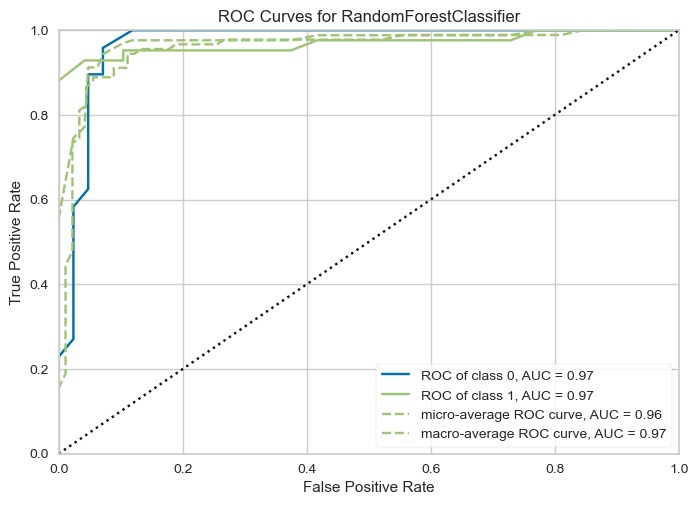

In [17]:
plot_model(model)

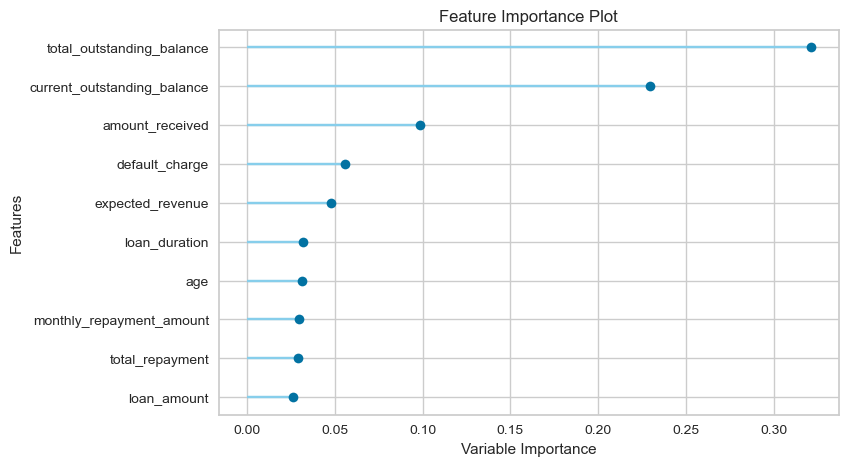

In [18]:
plot_model(model, plot="feature")

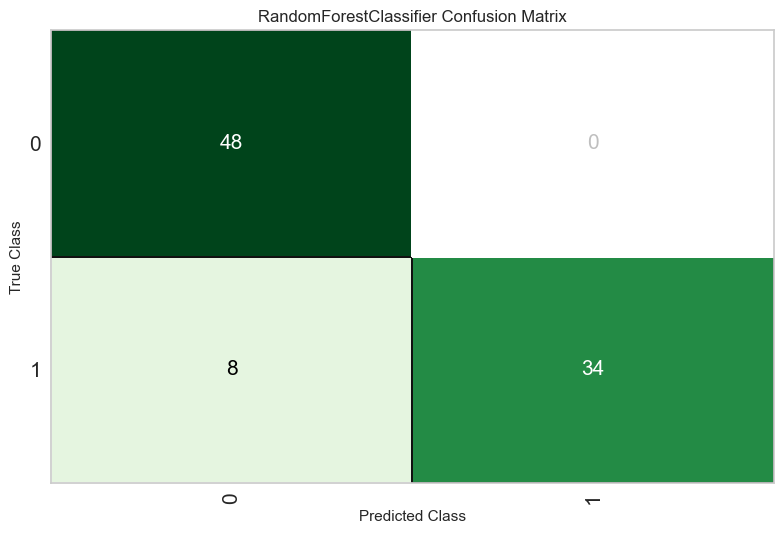

In [19]:
plot_model(model, plot="confusion_matrix")

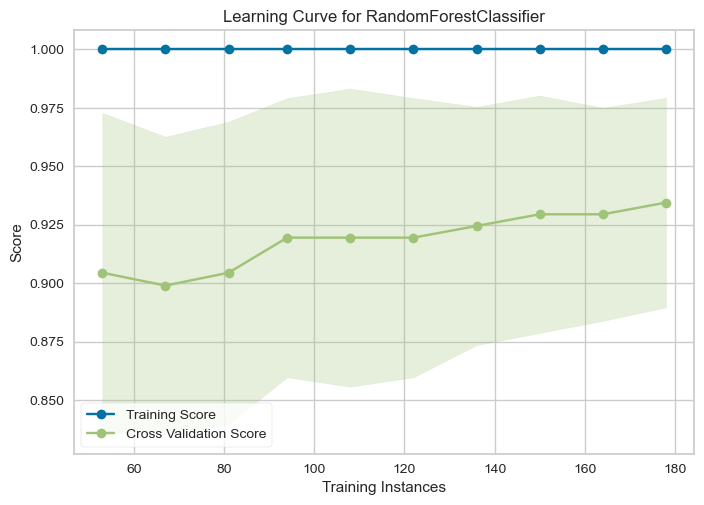

In [20]:
plot_model(estimator=model, plot="learning")

In [21]:
save_model(model, 'loan_classification_model', model_only=False)

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\DELL\AppData\Local\Temp\joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'loan_amount', 'tenure',
                                              'merchant_service_charge',
                                              'expected_revenue',
                                              'loan_duration',
                                              'monthly_re...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None, max_sample

In [38]:
new_data = {
    'gender': ['M', 'F', 'M', 'U', 'U'],
    'age': [28, 36.1, 39, 36.1, 42],
    'marital_status': ['M', 'U', 'U', 'U', 'U'],
    'employment_status': ['E', 'SE', 'U', 'U', 'U'],
    'loan_amount': [52000, 600000, 443000, 21500, 750000],
    'tenure': [3, 5, 6, 2, 4],
    'merchant_service_charge': [1040.0, 2000.0, 2000.0, 430.0, 2000.0],
    'expected_revenue': [6240.00, 72000.00, 64045.14, 2647.41, 76470.00],
    'loan_duration': [151, 151, 182, 214, 120],
    'monthly_repayment_amount': [11648.00000, 134400.00000, 84507.52333, 4829.48200, 206617.50000],
    'amount_received': [5.824000e+04, 6.720000e+05, 5.115451e+05, 2.416793e+04, 8.264700e+05],
    'total_repayment': [58240.00, 672000.00, 507045.14, 24147.41, 0],
    'interest_rate': [23, 10, 5.00, 35.00, 100.00],
    'current_outstanding_balance': [450000, 0.0, 200000, 67000, 0.0],
    'total_outstanding_balance': [100000, 50000, 450000, 20.518, 0.000],
    'default_charge': [5000, 13500, 4225.376167, 0.000000, 5000]
}

new_data = pd.DataFrame(new_data)

loaded_model = load_model('loan_classification_model')
predictions = predict_model(loaded_model, data=new_data)

Transformation Pipeline and Model Successfully Loaded


In [39]:
predictions

,gender,age,marital_status,employment_status,loan_amount,tenure,merchant_service_charge,expected_revenue,loan_duration,monthly_repayment_amount,amount_received,total_repayment,interest_rate,current_outstanding_balance,total_outstanding_balance,default_charge,prediction_label,prediction_score
0,M,28.000000,M,E,52000,3,1040.0,6240.000000,151,11648.000000,58240.000000,58240.000000,23.0,450000.0,100000.000,5000.000000,cleared,0.65
1,F,36.099998,U,SE,600000,5,2000.0,72000.000000,151,134400.000000,672000.000000,672000.000000,10.0,0.0,50000.000,13500.000000,cleared,0.81
2,M,39.000000,U,U,443000,6,2000.0,64045.140625,182,84507.523438,511545.093750,507045.125000,5.0,200000.0,450000.000,4225.375977,cleared,0.71
3,U,36.099998,U,U,21500,2,430.0,2647.409912,214,4829.481934,24167.929688,24147.410156,35.0,67000.0,20.518,0.000000,cleared,0.80
4,U,42.000000,U,U,750000,4,2000.0,76470.000000,120,206617.500000,826470.000000,0.000000,100.0,0.0,0.000,5000.000000,cleared,0.89


In [33]:
!pip freeze > requirements.txt

In [37]:
import pycaret
print(pycaret.__version__)

3.0.0


***

In [ ]:
df2 = pd.read_csv()